In [1]:
# Question: Can the frequencies of individual bird calls be used to ID species?
# What does a Fourier transform of a bird call look like?

In [2]:
import pandas as pd
import soundfile as sf
import scipy
from scipy.fft import fft, fftfreq, fftshift
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os
from IPython.display import Audio
from dataset_functions import spectrogram, display_spectrogram, apply_bandpass
print(os.getcwd())

/Users/justinbutler/Documents/Coding_Projects/BIRDCLEF/scripts


In [3]:
train_df = pd.read_csv("../data/birdclef-2022/train_metadata.csv")

<Axes: title={'center': 'Number of Calls per Category'}>

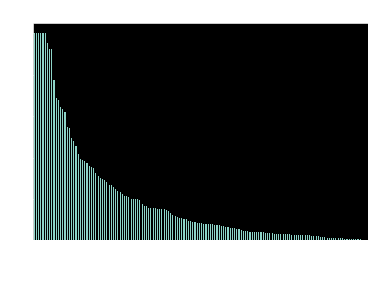

In [4]:
class_count = train_df["primary_label"].value_counts()
class_count.plot(kind='bar', title="Number of Calls per Category")

<Axes: title={'center': 'Number of High Quality Calls per Category'}>

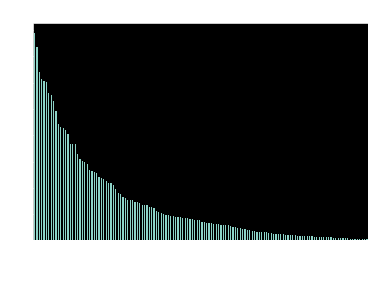

In [5]:
train_df_high_quality = train_df.loc[train_df["rating"] >= 4.5]
class_count_hq = train_df_high_quality["primary_label"].value_counts()
class_count_hq.plot(kind='bar', title='Number of High Quality Calls per Category')

<Axes: title={'center': 'Categories with more than 50 calls'}>

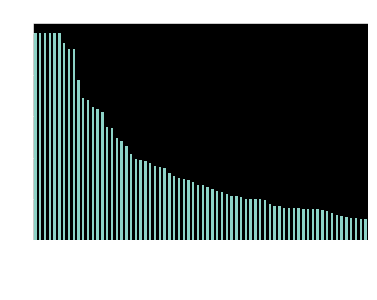

In [6]:
calls_count = 50
categories_greater_than_indices = train_df["primary_label"].value_counts().loc[lambda s: s>calls_count].index.tolist()
train_df_plentiful = train_df.loc[train_df["primary_label"].isin(categories_greater_than_indices)]
train_df_plentiful["primary_label"].value_counts().plot(kind='bar', title=f'Categories with more than {calls_count} calls')

Text(0.5, 1.0, 'Hawaii Creeper')

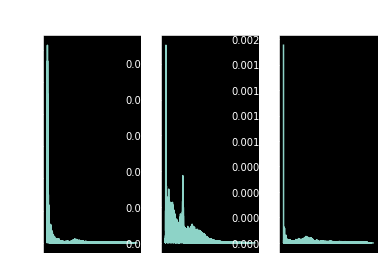

In [7]:
# Nyquest Rate : fs/2 or 1/2T
audio_afrsil1, afrsil1_samplerate = sf.read("../data/birdclef-2022/train_audio/afrsil1/XC125458.ogg")
test_fft1 = fft(audio_afrsil1)
xf1 = np.linspace(0.0, afrsil1_samplerate/2.0, audio_afrsil1.size//2)
yf1 = 2.0/audio_afrsil1.size * np.abs(test_fft1[:audio_afrsil1.size//2])
audio1_duration_seconds = len(audio_afrsil1) / afrsil1_samplerate

audio_bkbplo, bkbplo_samplerate = sf.read("../data/birdclef-2022/train_audio/bkbplo/XC25685.ogg")
test_fft2 = fft(audio_bkbplo)
xf2 = np.linspace(0.0, bkbplo_samplerate/2.0, audio_bkbplo.size//2)
yf2 = 2.0/audio_bkbplo.size * np.abs(test_fft2[:audio_bkbplo.size//2])
audio2_duration_seconds = audio_bkbplo.size / bkbplo_samplerate

audio_hawcre, hawcre_samplerate = sf.read("../data/birdclef-2022/train_audio/hawcre/XC27351.ogg")
test_fft3 = fft(audio_hawcre)
xf3 = np.linspace(0.0, hawcre_samplerate/2.0, audio_hawcre.size//2)
yf3 = 2.0/audio_hawcre.size * np.abs(test_fft3[:audio_hawcre.size//2])

# Plot test FFT data
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle("FFT of Various Species Calls")
ax1.plot(xf1, yf1)
ax1.set_title("African SilverBill")
ax2.plot(xf2, yf2)
ax2.set_title("Black-Bellied Plover")
ax3.plot(xf3, yf3)
ax3.set_title("Hawaii Creeper")

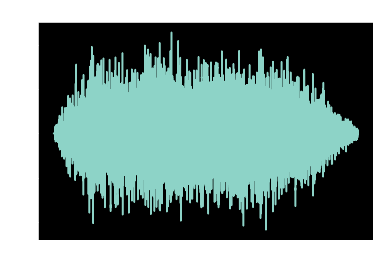

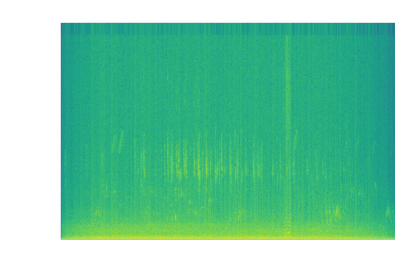

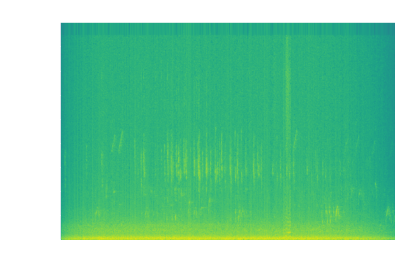

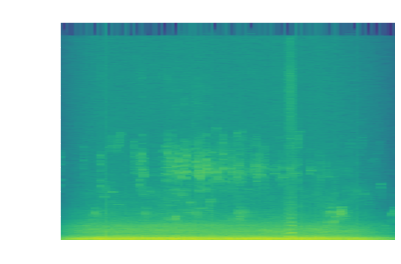

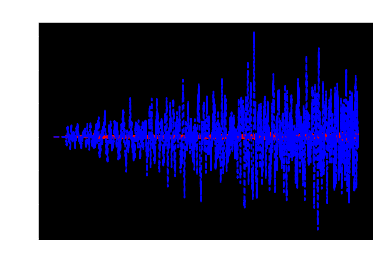

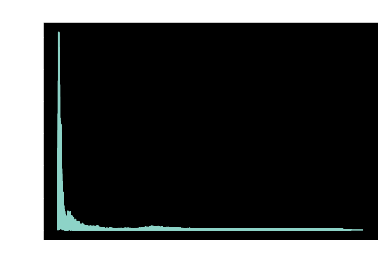

In [8]:
plt.plot(np.linspace(0, audio1_duration_seconds, num=len(audio_afrsil1)), audio_afrsil1)
plt.title('Waveplot of African SilverBill')
plt.show()

# Plot FFT of Audio 1
plt.plot(xf1, yf1)
plt.title("FFT of African SilverBill")

# Plot spectrogram of Audio 1 with different parameters
display_spectrogram(*spectrogram(audio_afrsil1, afrsil1_samplerate, frame_overlap=0.5, frame_duration_ms=20), title_addon="African Silverbill")
display_spectrogram(*spectrogram(audio_afrsil1, afrsil1_samplerate, frame_overlap=0.2, frame_duration_ms=20), title_addon="African Silverbill")
display_spectrogram(*spectrogram(audio_afrsil1, afrsil1_samplerate, frame_overlap=0.3, frame_duration_ms=300), title_addon="African Silverbill")

banded_afrsil1 = apply_bandpass(audio_afrsil1, afrsil1_samplerate, lower_freq_hz=2000, upper_freq_hz=8000)
time_s = np.linspace(0, audio1_duration_seconds, num=len(audio_afrsil1))
plt.plot(time_s[:40000], banded_afrsil1[:40000], 'r--', time_s[:40000], audio_afrsil1[:40000], 'b--')
plt.title('Normal vs Banded waveplot of African SilverBill')
plt.show()

# Plot FFT of Audio 1
banded_afrsil1 = fft(banded_afrsil1)
xf1 = np.linspace(0.0, afrsil1_samplerate/2.0, banded_afrsil1.size//2)
yf1 = 2.0/banded_afrsil1.size * np.abs(test_fft1[:banded_afrsil1.size//2])
plt.plot(xf1, yf1)
plt.title("FFT of Banded African SilverBill Call")
plt.show()

In [9]:
# To play a sound in Jupyter notebook
# Audio("/Users/justinbutler/Documents/Coding_Projects/BIRDCLEF/data/train_audio/afrsil1/XC125458.ogg")

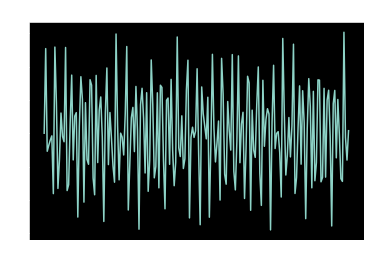

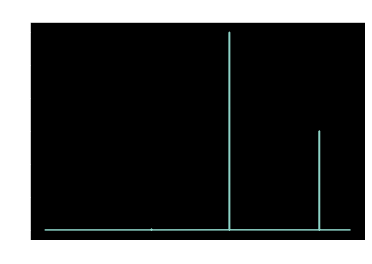

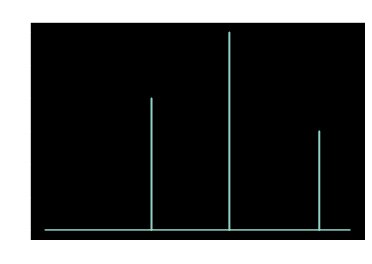

In [10]:
sample_rate_sine   = 4000
sine_duration_seconds = 3.0
sine_samples = np.arange(sine_duration_seconds * sample_rate_sine) / sample_rate_sine
f1_hz = 697
f2_hz = 1209
f3_hz = 1800

# Sine = A*sin(2*pi*f*t+phase)
sine1 = 2*np.sin(2*np.pi*f1_hz*sine_samples).astype(np.float32)
sine2 = 3*np.sin(2*np.pi*f2_hz*sine_samples).astype(np.float32)
sine3 = 1.5*np.sin(2*np.pi*f3_hz*sine_samples).astype(np.float32)

super_sine = sine1 + sine2 + sine3
plt.plot(sine_samples[:200], super_sine[:200])
plt.title("Super Sine Window")
plt.show()

banded_super_sine = apply_bandpass(super_sine, lower_freq_hz=1000, upper_freq_hz=afrsil1_samplerate, sample_rate=sample_rate_sine)
# Plot FFT of Sine
band_sine_fft = fft(banded_super_sine)
xf_sine = np.linspace(0.0, sample_rate_sine/2.0, banded_super_sine.size//2)
yf_sine = 2.0/banded_super_sine.size * np.abs(band_sine_fft[:banded_super_sine.size//2])
plt.plot(xf_sine, yf_sine)
plt.title("FFT of Banded Super Sine")
plt.show()

# Plot FFT of Sine
sine_fft = fft(super_sine)
xf_sine = np.linspace(0.0, sample_rate_sine/2.0, super_sine.size//2)
yf_sine = 2.0/super_sine.size * np.abs(sine_fft[:super_sine.size//2])
plt.plot(xf_sine, yf_sine)
plt.title("FFT of Super Sine")
plt.show()

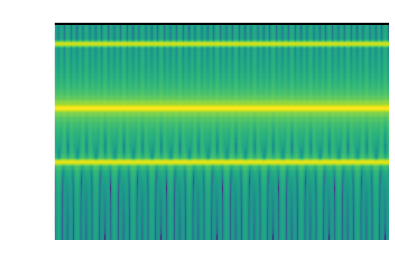

Text(0.5, 1.0, 'Spectrogram - PyPlot')

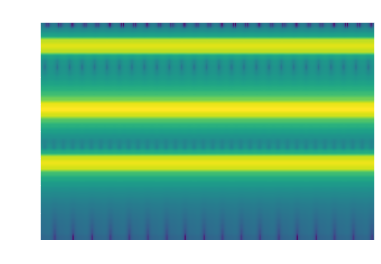

In [11]:
# FT representation does not provide Time information
# But bird calls follow distinct (time-dependent) patterns
# Better to use spectrogram
display_spectrogram(*spectrogram(super_sine, sample_rate_sine))

# Built in function example
frame_size = int(sample_rate_sine * 20 * 0.001)
frame_stride_size = int(frame_size * 0.5)
plt.specgram(super_sine, Fs=sample_rate_sine, NFFT=frame_size, noverlap=frame_stride_size)
plt.title('Spectrogram - PyPlot')

Possible Learning Methods:
- Learn from Spectrogram (Image-based learning)
- Learn from waveform (transformer? Simple model?)
- Learn from audio?

Test soundscape duration: 600.0 seconds.
Test audio DC bias: -0.010058315370725856
[[-0.00933968 -0.01086869 -0.01235762 ... -0.00802334 -0.00768057
  -0.00864797]
 [-0.00978152 -0.00983986 -0.01008757 ... -0.01152964 -0.01106341
  -0.01236244]
 [-0.01461719 -0.01342834 -0.01330834 ... -0.01063234 -0.01135894
  -0.0127017 ]
 ...
 [-0.00645077 -0.006575   -0.00572189 ... -0.01149262 -0.01076851
  -0.01109003]
 [-0.01106504 -0.0109944  -0.0099735  ... -0.01111454 -0.01140825
  -0.01189069]
 [-0.01108573 -0.01133923 -0.0117713  ... -0.00988951 -0.0107804
  -0.01064758]]
[[-0.00000000e+00 -6.54824633e-10 -2.97812106e-09 ... -1.93358419e-09
  -4.62744040e-10 -0.00000000e+00]
 [-0.00000000e+00 -5.92838675e-10 -2.43105259e-09 ... -2.77858305e-09
  -6.66556259e-10 -0.00000000e+00]
 [-0.00000000e+00 -8.09040196e-10 -3.20724055e-09 ... -2.56233901e-09
  -6.84361224e-10 -0.00000000e+00]
 ...
 [-0.00000000e+00 -3.96135071e-10 -1.37894489e-09 ... -2.76966051e-09
  -6.48788776e-10 -0.00000000e+00]
 

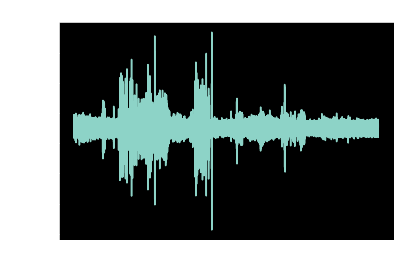

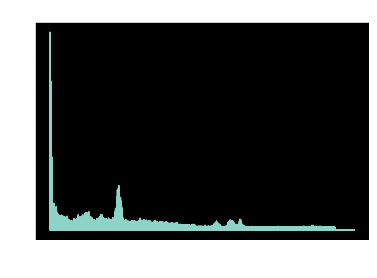

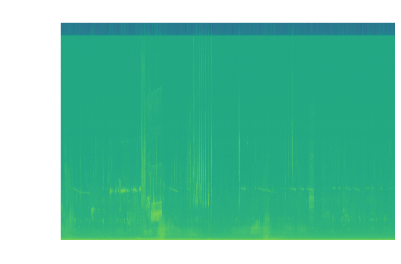

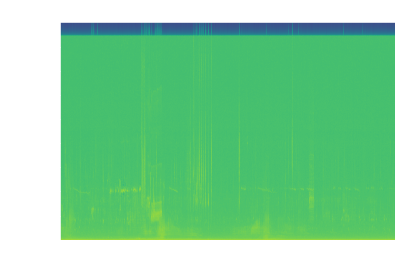

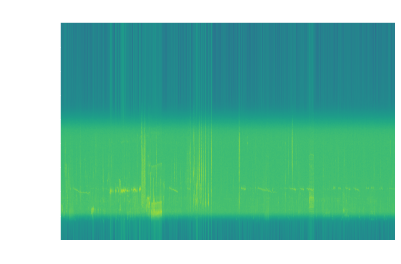

In [12]:
test_audio_2023, samplerate_2023 = sf.read("../data/birdclef-2023/test_soundscapes/soundscape_29201.ogg")
test_2023_duration = len(test_audio_2023) / samplerate_2023
print(f"Test soundscape duration: {test_2023_duration} seconds.")
print(f'Test audio DC bias: {np.mean(test_audio_2023)}')
banded_test_audio_2023 = apply_bandpass(test_audio_2023, samplerate_2023, lower_freq_hz=2000, upper_freq_hz=8000)

xf_time = np.linspace(0, test_2023_duration, test_audio_2023.size)

plt.plot(xf_time, test_audio_2023)
plt.xlabel('Time (s)')
plt.ylabel('Magnitude')
plt.title('Test Soundscape Waveform')
plt.show()

test_2023_mean = np.mean(test_audio_2023)
test_2023_fft = fft(test_audio_2023 - test_2023_mean)
xf_2023 = np.linspace(0.0, samplerate_2023/2.0, test_audio_2023.size//2)
yf_2023 = 2.0/test_audio_2023.size * np.abs(test_2023_fft[:test_audio_2023.size//2])

plt.plot(xf_2023, yf_2023)
plt.xlabel('Freq.')
plt.ylabel('Magnitude')
plt.title('Test Soundscape FFT')
plt.show()

display_spectrogram(*spectrogram(test_audio_2023, samplerate_2023, frame_overlap=0.3, frame_duration_ms=400), title_addon="Test Waveform")
display_spectrogram(*spectrogram(test_audio_2023, samplerate_2023, frame_overlap=0.3, frame_duration_ms=400, hann_weighting=True), title_addon="Test Waveform w. Hann")
display_spectrogram(*spectrogram(banded_test_audio_2023, samplerate_2023, frame_overlap=0.3, frame_duration_ms=400), title_addon="Banded Test Waveform")